# NewYorkCity Airbnb Data Analysis, Visualization and Predication 

## Introduction 

Airbnb has been widely used these days by people for traveling. Here, I try to explore the NYC airbnb dataset to understand the airbnb market in NYC. In particular, to get some insights regarding the following questions:
    1. What is the difference among the neighbourhood of NYC?
    2. Which factors affect the price?
    3. Can we predict the price?

The dataset is from Kaggle (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). It has around 49,000 observations with 16 columns. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Dataset

In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

### check null values

In [6]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# drop unnecessary columns
airbnb.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [8]:
# replace NAN in 'reviews_per_month' by zero
airbnb.fillna({'reviews_per_month': 0}, inplace=True)

In [9]:
# check NAN value in the table
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
# the average listing price is $152 according to the previous table

## Data Visualization 

In [13]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Correlation between different variables 

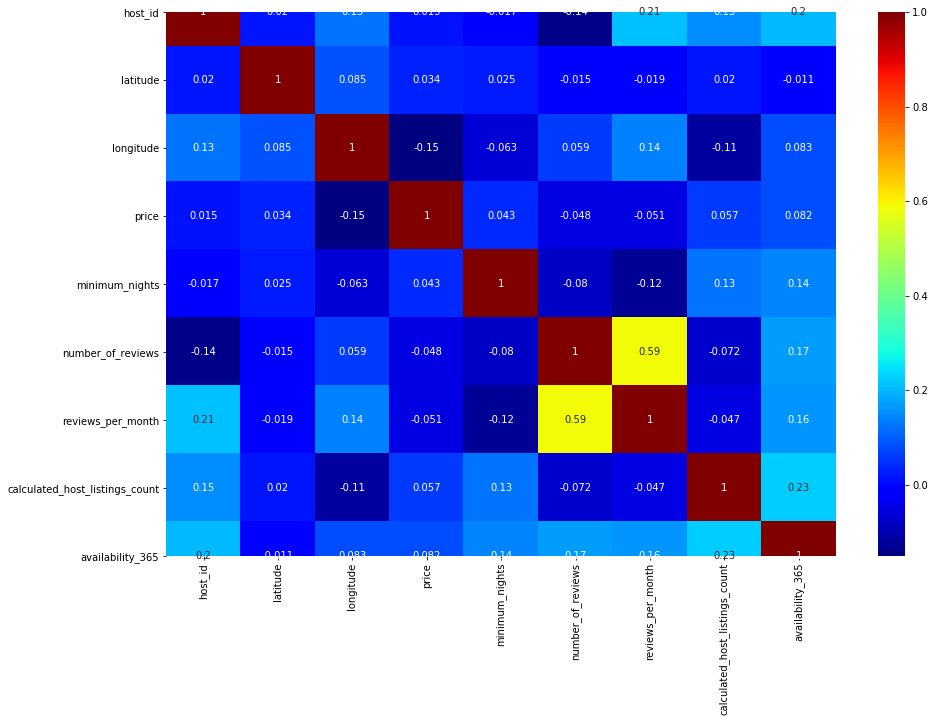

In [14]:
corr = airbnb.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='jet')


In [15]:
# no clear correlation seen between price and other factors

### How different among neighbourhood groups? 

#### Map of Neighbourhood group 

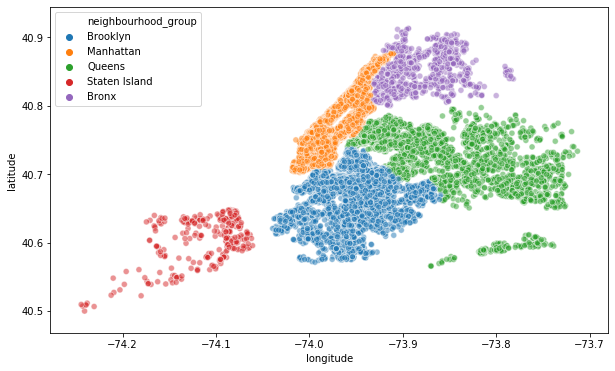

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)

#### number of listings vs. neighbourhood group

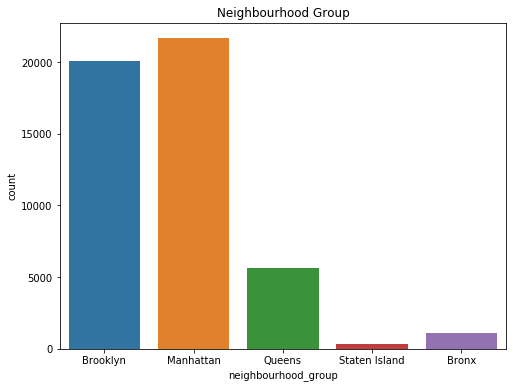

In [17]:
# counting listings
plt.figure(figsize=(8,6))
plt.title('Neighbourhood Group')
sns.countplot(airbnb['neighbourhood_group']) 

In [18]:
# Manhattan and Brooklyn have the highest number of listings 

#### room types vs. neighbourhood group

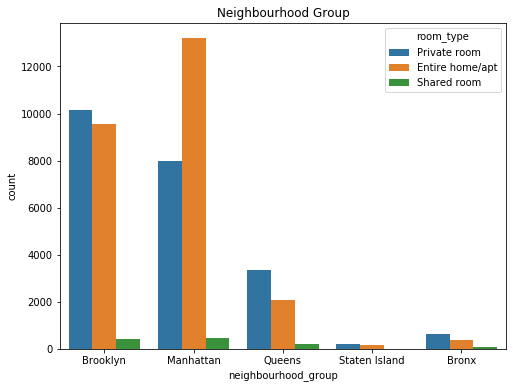

In [19]:
# counting room_type in each neighbourhood group

plt.figure(figsize=(8,6))
plt.title('Neighbourhood Group')
sns.countplot(airbnb['neighbourhood_group'], hue=airbnb['room_type'])

In [20]:
# Brooklyn has more private rooms than Manhattan, while Manhattan has more entire homes/apts.

#### Availability of Room vs. neighbourhood group

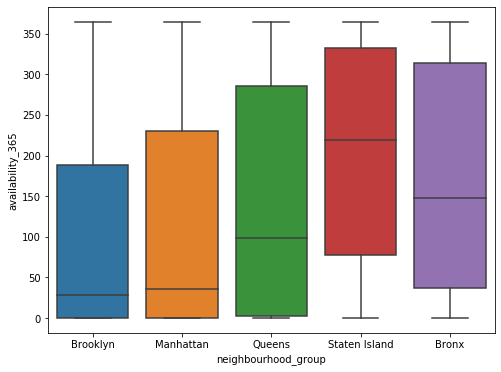

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['availability_365'])

In [22]:
# the availability is low at Brooklyn and Manhattan compared to others.

#### Price vs. neighbourhood group

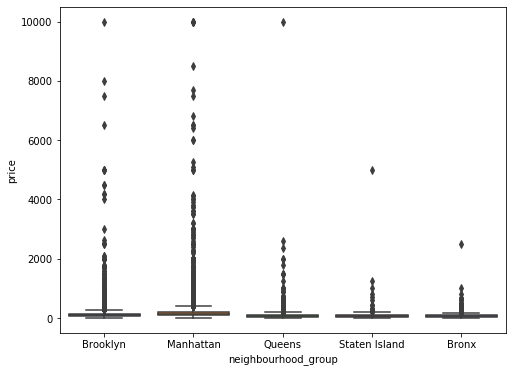

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['price'])

# need to drop outliers to see the difference of price.

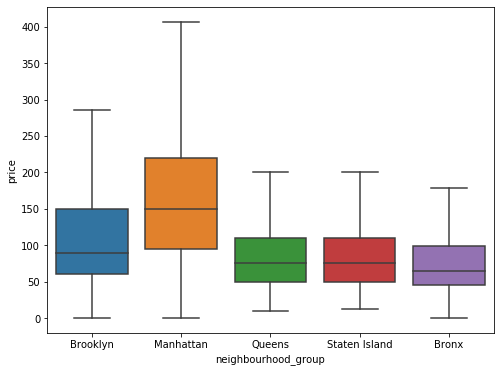

In [24]:
# drop outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price', showfliers=False)

In [25]:
# The median of price in Manhattan is ~$150, which is much higher than other neighbourhoods.

/Users/lizhen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


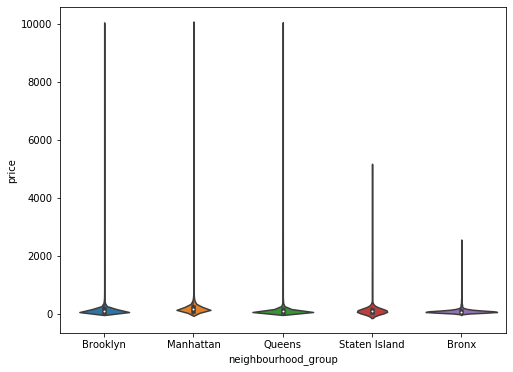

In [26]:
plt.figure(figsize=(8,6))
sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')

In [27]:
# drop outliers

airbnb = airbnb[airbnb['price']<500]

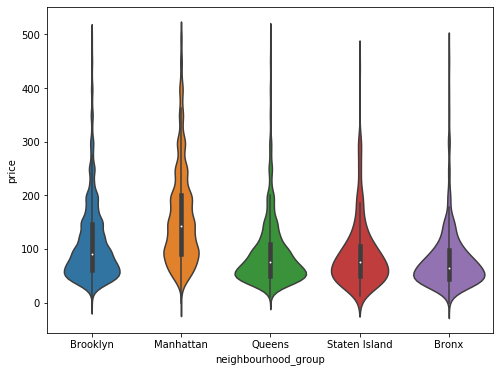

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')

In [29]:
# the range of price is larger in manhattan than other locatons.

### Which factors affect the price?

#### Room Type vs. price

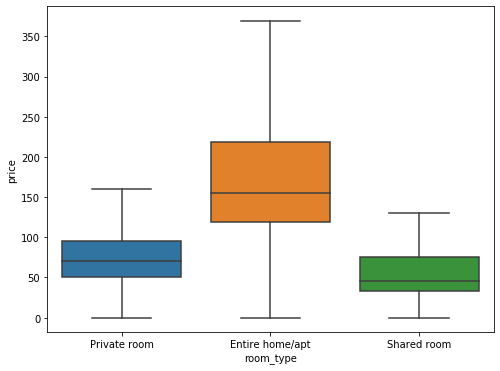

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['room_type'], y=airbnb['price'], showfliers=False)

In [31]:
# entire home/apt is more expensive than private room and shared room. make sense. 
# Private room does not much more expensive than shared room.

#### neighbourhood vs. price

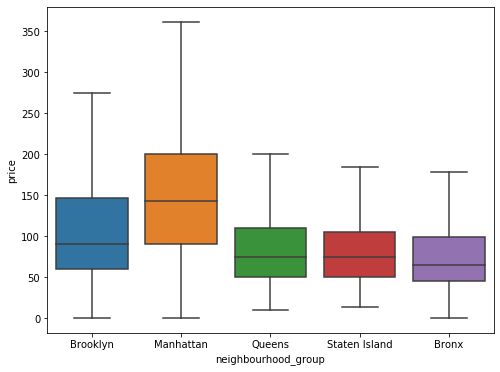

In [32]:
# drop outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price', showfliers=False)

In [33]:
# price at manhattan is much more expensive than other locations.

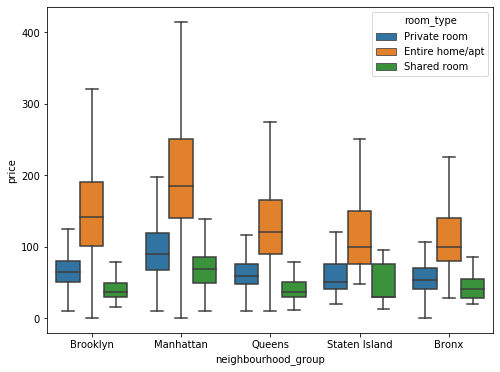

In [34]:
# by room type

plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb['neighbourhood_group'], y=airbnb['price'], hue=airbnb['room_type'], showfliers=False)

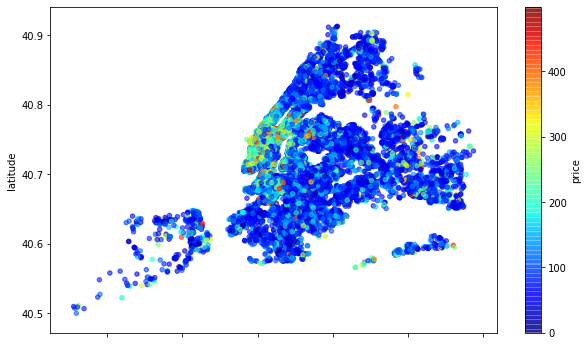

In [35]:
# price map
airbnb.plot.scatter(x='longitude', y='latitude', c='price', colormap='jet', colorbar=True, alpha=0.6, figsize=(10,6))

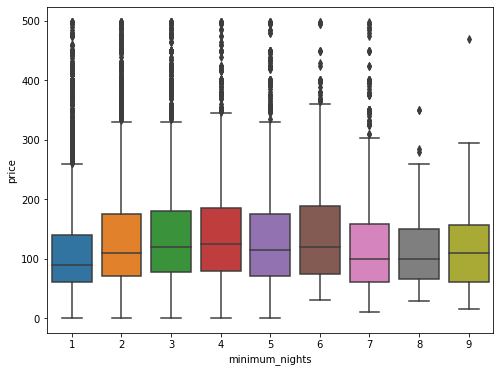

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb[airbnb['minimum_nights']<10].minimum_nights, y=airbnb['price'])

In [37]:
# not very clear. but looks like the price for minimum nights equals to 1 is slightly lower. Interesting.

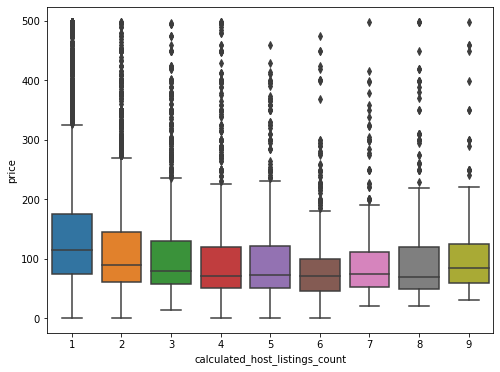

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb, x=airbnb[airbnb['calculated_host_listings_count']<10].calculated_host_listings_count, y=airbnb['price'])

In [39]:
# looks like the price for calculated_host_listings_count equals to 1 is slightly higher.

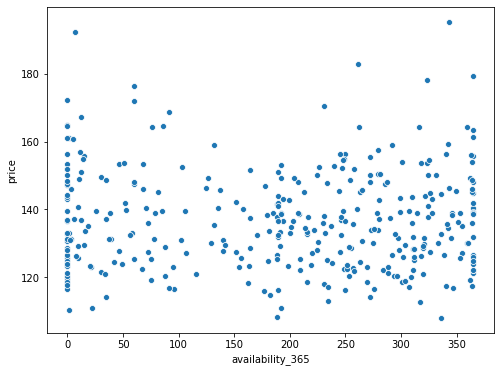

In [40]:
plt.figure(figsize=(8,6))
mean_price_by_availability = airbnb.groupby('availability_365')['price'].mean()
# price_by_availability
sns.scatterplot(data=airbnb, x=airbnb['availability_365'], y=mean_price_by_availability)

In [41]:
# no clear trend betwen availability and price.

In [42]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.766000e+04,47660.000000,47660.000000,47660.000000,47660.000000,47660.000000,47660.000000,47660.00000,47660.000000
mean,6.713426e+07,40.728781,-73.951574,130.053903,6.978095,23.593957,1.101577,7.09616,111.019052
std,7.824688e+07,0.054832,0.046270,85.087684,20.337478,44.870894,1.604420,32.82209,130.874497
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
25%,7.778878e+06,40.689780,-73.982590,68.000000,1.000000,1.000000,0.040000,1.00000,0.000000
50%,3.056777e+07,40.722520,-73.955130,100.000000,2.000000,5.000000,0.380000,1.00000,42.000000
75%,1.072169e+08,40.763260,-73.935450,170.000000,5.000000,24.000000,1.610000,2.00000,221.000000
max,2.743213e+08,40.913060,-73.712990,499.000000,1250.000000,629.000000,58.500000,327.00000,365.000000


### WordCloud 

In [43]:
from wordcloud import WordCloud

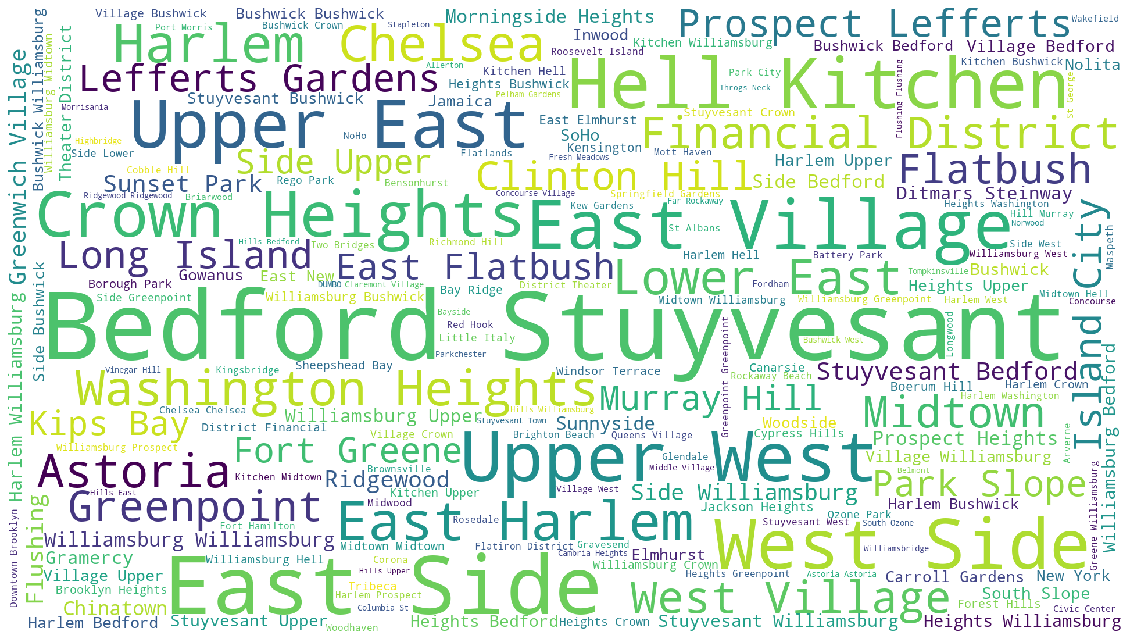

In [44]:
plt.figure(figsize=(20,16))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(' '.join(airbnb['neighbourhood']))
plt.axis('off')
plt.imshow(wordcloud)

### Can we predict the price?

#### Data preprocessing 

In [45]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Categorical columns 

In [46]:
# drop unnecessary columns
airbnb.drop(['host_id','latitude','longitude','neighbourhood',
            'number_of_reviews','reviews_per_month'], axis=1, inplace=True)
airbnb.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [47]:
airbnb['neighbourhood_group'].nunique()

5

In [48]:
airbnb['room_type'].nunique()

3

In [49]:
airbnb_new = airbnb.copy()

In [50]:
# preprocessing categorical columns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()
airbnb_new['neighbourhood_group'] = le.fit_transform(airbnb_new['neighbourhood_group'])
airbnb_new['room_type'] = le.fit_transform(airbnb_new['room_type'])
airbnb_new.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,149,1,6,365
1,2,0,225,1,2,355
2,2,1,150,3,1,365
3,1,0,89,1,1,194
4,2,0,80,10,1,0


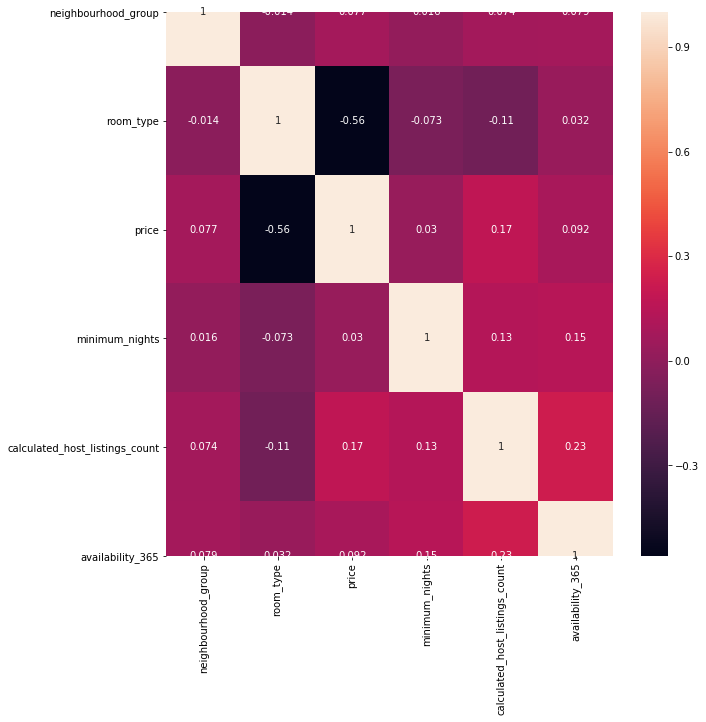

In [52]:
corr = airbnb_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

#### Linear Regression 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [54]:
X = airbnb_new.drop('price', axis=1)
y = airbnb_new['price']

In [55]:
X.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,1,6,365
1,2,0,1,2,355
2,2,1,3,1,365
3,1,0,1,1,194
4,2,0,10,1,0


In [56]:
y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [57]:
# training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [58]:
X_train.shape

(33362, 5)

In [59]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
lr_score_train = r2_score(y_train, y_pred_train)
lr_score_test = r2_score(y_test, y_pred_test)
print('Score on training set: {:.3f}'.format(lr_score_train))
print('Score on testing set: {:.3f}'.format(lr_score_test))

Score on training set: 0.335
Score on testing set: 0.341


#### Decision Tree

In [60]:
# the score is not high. Maybe because the features are not closely correlated to the price.

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
dt_score_train = r2_score(y_train, y_pred_train)
dt_score_test = r2_score(y_test, y_pred_test)
dt
print('Score on training set: {:.3f}'.format(dt_score_train))
print('Score on testing set: {:.3f}'.format(dt_score_test))

Score on training set: 0.709
Score on testing set: 0.193


In [62]:
# Score on training set is much higher than that on testing set, indicating overfitting.

In [64]:
# Decision Tree, try to solve the overfitting by limiting max_depth and min_samples_leaf
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
dt_score_train = r2_score(y_train, y_pred_train)
dt_score_test = r2_score(y_test, y_pred_test)
dt
print('Score on training set: {:.3f}'.format(dt_score_train))
print('Score on testing set: {:.3f}'.format(dt_score_test))

Score on training set: 0.420
Score on testing set: 0.414


In [65]:
# limiting max depth of decision is helpful to increase the score.

#### Random Forest 

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rf_score_train = r2_score(y_train, y_pred_train)
rf_score_test = r2_score(y_test, y_pred_test)
print('Score on training set: {:.3f}'.format(rf_score_train))
print('Score on testing set: {:.3f}'.format(rf_score_test))

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score on training set: 0.662
Score on testing set: 0.346


In [67]:
# Random Forest, try to solve the overfitting

from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rf_score_train = r2_score(y_train, y_pred_train)
rf_score_test = r2_score(y_test, y_pred_test)
print('Score on training set: {:.3f}'.format(rf_score_train))
print('Score on testing set: {:.3f}'.format(rf_score_test))

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score on training set: 0.494
Score on testing set: 0.443


In [66]:
# Random Forest is better. But the score is still not high. More features are needed.

### Conclusion 

In [69]:
'''
1. What is the difference among the neighbourhood of NYC?
    - Most of listings are in Manhattan and Brooklyn. 
    - Brooklyn has more private rooms than Manhattan, while Manhattan has more entire homes/apts.
    - The availability is lower in Brooklyn and Manhattan compared to others.
    - The price in Manhattan is much higher than other neighbourhoods. The median price in Manhattan is ~$150, 
    while other locations are less than $100.
    - The range of price is larger in manhattan than other locatons.
    
2. Which factors affect the price?
    - Entire home/apt is more expensive than private room and shared room. 
    But, private room does not much more expensive than shared room.
    - Price in manhattan is much more expensive than other locations.
    - Intersting things: the price for listings that minimum nights equals to 1 is slightly lower than others; 
    the price for listings that calculated_host_listings_count equals to 1 is slightly higher.

3. Can we predict the price?
    - Three models are used to predict the price. Random forest gives the best result with an R2 score of 0.44, 
    compared to decision tree and linear regression. 
    - The score is still not high. It might because the features used are not quite correlated with the price. 
    More features are needed for a better result.

''' 

'\n1. What is the difference among the neighbourhood of NYC?\n    - Most of listings are in Manhattan and Brooklyn. \n    - Brooklyn has more private rooms than Manhattan, while Manhattan has more entire homes/apts.\n    - The availability is lower at Brooklyn and Manhattan compared to others.\n    - The price in Manhattan is much higher than other neighbourhoods. The median of price in Manhattan is ~$150, \n    while other locations are less than $100.\n    - The range of price is larger in manhattan than other locatons.\n    \n2. Which factors affect the price?\n    - Entire home/apt is more expensive than private room and shared room. \n    But, private room does not much more expensive than shared room.\n    - Price at manhattan is much more expensive than other locations.\n    - Intersting things: the price for listings that minimum nights equals to 1 is slightly lower than others; \n    the price for listings that calculated_host_listings_count equals to 1 is slightly higher.\n\n